In [2]:
# Importing Packages:

# EDA:
import pandas as pd # For Feature Manipulation

import numpy as np # For Maths

import seaborn as sns
import matplotlib.pyplot as plt # For Visualization

# For Preprocessing:
from sklearn.model_selection import train_test_split # For Splitting the Data

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, KBinsDiscretizer # For Scaling the Data

from sklearn.preprocessing import PowerTransformer,FunctionTransformer # For Normalization

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, TargetEncoder # For Encoding the Data

from sklearn.experimental import enable_iterative_imputer 

from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer # For Imputing the missing values

from sklearn.compose import ColumnTransformer # Column Transformer

from sklearn.pipeline import Pipeline # Pipeline

from sklearn.datasets import make_regression

# Model and Evaluation:
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor # As we have classes in data, we'll choose Model from regression family

from sklearn.metrics import classification_report, r2_score, root_mean_squared_error # Accuracy check

from joblib import dump

In [3]:
df2 = pd.read_csv('zameen-updated.csv')
print(df2.shape)
df2.head()

(168446, 20)


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


We have dataset that contains data of ads uploaded on zameen.com by real estate agencies in 5 different cities.

In [4]:
df2.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


<Axes: >

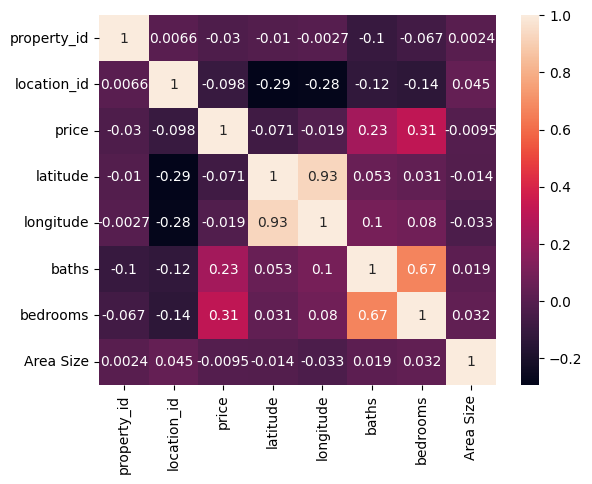

In [5]:
sns.heatmap(df2.select_dtypes(include='number').corr(), annot=True)

We don't have much correlated features

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [7]:
df2.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

Some missing values in 2 features that are not much needed in model training still we will impute it.

In [8]:
imputer = SimpleImputer(strategy= 'constant', fill_value='unknown')
imputed= imputer.fit_transform(df2[['agent', 'agency']])
df2[['agent', 'agency']] = pd.DataFrame(imputed)

<Axes: xlabel='date_added', ylabel='price'>

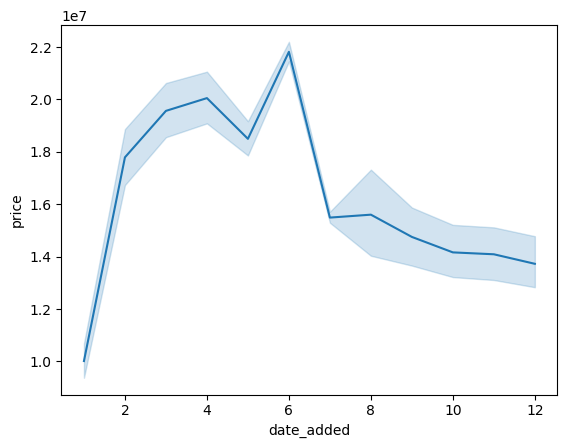

In [9]:
sns.lineplot(data=df2, x = pd.to_datetime(df2['date_added']).dt.month, y = df2['price'])

Not much insight extracted from date added of an ad on a portal but little better for model

To manage the memory usage, converting all object features into categorical

In [10]:
print(f'Memory Usage Before: {df2.memory_usage(deep=True, index=True).sum() / (1024 ** 2):.2f} MBs')

Memory Usage Before: 157.32 MBs


In [11]:
for i in df2.select_dtypes('object').columns:
    df2[i] = df2[i].astype('category')

In [12]:
print(f'Memory Usage After: {df2.memory_usage(deep=True, index=True).sum() / (1024 ** 2):.2f} MBs')

Memory Usage After: 48.61 MBs


In [13]:
print(f'Duplicated Values: {df2.duplicated().sum()}')

Duplicated Values: 0


On the basis of purpose of ads, we will make 2 data frames, one for rent, and second for sale, so 2 different model can work on 2 different tasks easily.

In [14]:
df3 = df2[df2['purpose']=='For Sale'][['property_type', 'location', 'latitude', 'longitude', 'area', 'bedrooms' ]]

Choosing only 9 features out of 20, as per requirement

In [15]:
df3['year'] = pd.to_datetime(df2['date_added']).dt.year
df3['month'] = pd.to_datetime(df2['date_added']).dt.month
df3['city'] = df2['city'].astype(str) + '-' + df2['province_name'].astype(str)

In [16]:
df4 = df2[df2['purpose']=='For Rent'][['property_type', 'location', 'latitude', 'longitude', 'area', 'bedrooms']]

In [17]:
df4['year'] = pd.to_datetime(df2['date_added']).dt.year
df4['month'] = pd.to_datetime(df2['date_added']).dt.month
df4['city'] = df2['city'].astype(str) + '-' + df2['province_name'].astype(str)

In [18]:
df3.loc[df3['city'] == 'Islamabad-Islamabad Capital', 'city'] = 'Islamabad'
df4.loc[df4['city'] == 'Islamabad-Islamabad Capital', 'city'] = 'Islamabad'

df3 is dataframe for sale data \
df4 is dataframe for rent data \
these dataframes constains columns property_type, location, latitude, longitude, area, bedrooms, year, month and city

Now time to check for outliers

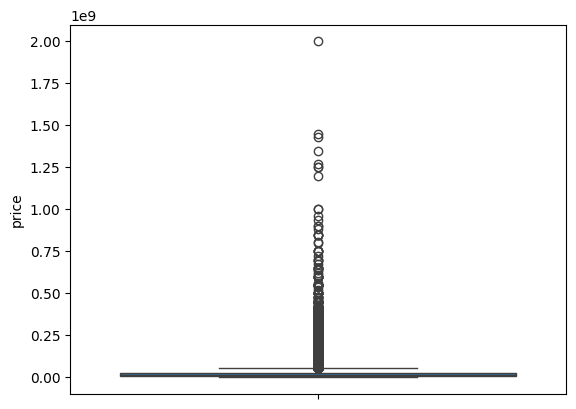

In [19]:
sns.boxplot(df2[df2['purpose']=='For Sale']['price'])
plt.show()

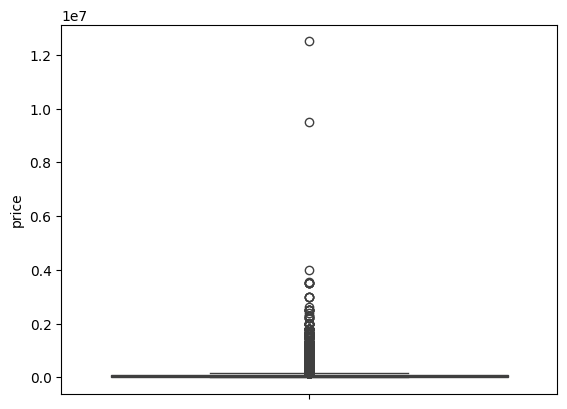

In [20]:
sns.boxplot(df2[df2['purpose']=='For Rent']['price'])
plt.show()

In [21]:
sq1 = df2[df2['purpose']=='For Sale']['price'].quantile(0.25)
sq3 = df2[df2['purpose']=='For Sale']['price'].quantile(0.75)
siqr = sq3 - sq1

slower_bound = sq1 - 1.5 * siqr
supper_bound = sq3 + 1.5 * siqr

rq1 = df2[df2['purpose']=='For Rent']['price'].quantile(0.25)
rq3 = df2[df2['purpose']=='For Rent']['price'].quantile(0.75)
riqr = rq3 - rq1

rlower_bound = rq1 - 1.5 * riqr
rupper_bound = rq3 + 1.5 * riqr

df3['sale'] = df2[df2['purpose']=='For Sale']['price'].clip(lower=slower_bound, upper=supper_bound)
df4['rent'] = df2[df2['purpose']=='For Rent']['price'].clip(lower=rlower_bound, upper=rupper_bound)

Outliers capped

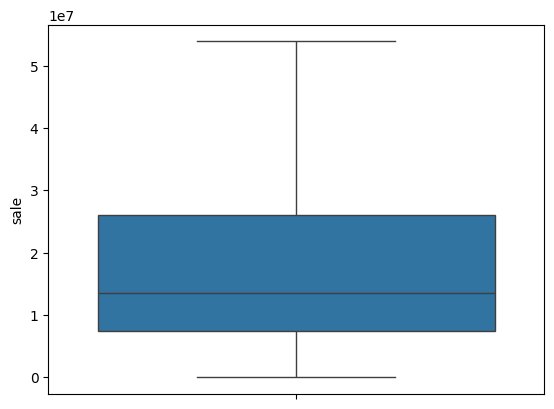

In [22]:
sns.boxplot(df3['sale'])
plt.show()

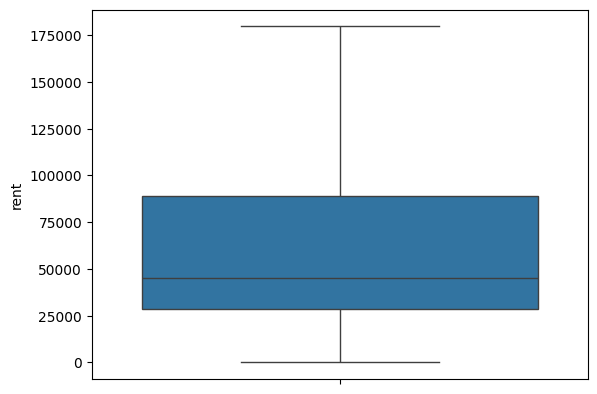

In [23]:
sns.boxplot(df4['rent'])
plt.show()

### RENT MODEL
It contains 9 features, it has its own pipeline and column transformer

In [24]:
x = df4
y = df4['rent']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

pipe1 =  Pipeline(steps=[("preprocessor", ColumnTransformer(transformers=[
                        ("num", StandardScaler(), ['latitude', 'longitude', 'bedrooms', 'year', 'month']),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), ['property_type', 'location', 'area', 'city'])],
                        remainder="drop")), ("model", LinearRegression())]) 
pipe1.fit(xtrain, ytrain)

ypred = pipe1.predict(xtest)

In [25]:
print(f'We are getting good accuracy: {r2_score(ytest, ypred)*100:.2f}%')

We are getting good accuracy: 83.63%


### SALE MODEL
It contains 9 features, it has its own pipeline and column transformer

In [31]:
x = df3
y = df3['sale']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

pipe2 =  Pipeline(steps=[("preprocessor", ColumnTransformer(transformers=[
                        ("num", StandardScaler(), ['latitude', 'longitude', 'bedrooms', 'year', 'month']),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), ['property_type', 'location', 'area', 'city'])],
                        remainder="drop")),
                        ('model', LinearRegression())]) 
pipe2.fit(xtrain, ytrain)

ypred = pipe2.predict(xtest)

In [32]:
print(f'We are getting good accuracy: {r2_score(ytest, ypred)*100:.2f}%')

We are getting good accuracy: 86.66%


Same work through stochastic gradient decent to check if time and accuracy be better

In [33]:
decent = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=50, tol=0.01)

x = df3
y = df3['sale']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

pipe =  Pipeline(steps=[("preprocessor", ColumnTransformer(transformers=[
                        ("num", StandardScaler(), ['latitude', 'longitude', 'bedrooms', 'year', 'month']),
                        ("cat", OneHotEncoder(handle_unknown='ignore'), ['property_type', 'location', 'area', 'city'])],
                        remainder="drop")),
                        ('model', decent)]) 
pipe.fit(xtrain, ytrain)

ypred = pipe.predict(xtest)

In [34]:
print(f'Accuracy: {r2_score(ytest, ypred)*100:.2f}%')

Accuracy: 85.75%


its better save our model that is trained on linear regression model

In [35]:
dump(pipe1, 'Rent.joblib')
dump(pipe2, 'Sale.joblib')
print('Models are saved succesfully')

Models are saved succesfully
